In [1]:
#import modules and packages

import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

# Cross Validation Imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
#suppress all future warning
warnings.filterwarnings('ignore')
#see only one time warning
#warnings.filterwarnings(action='once')

In [3]:
#import data

df = pd.read_csv('EPL.csv')

# <div class = "alert alert-block alert-success"> DATA DESCRIPTION</div>

## EPL Results 2006/07-2018/19

This data set represents information gathered about matches played in the English Premier League from the 2006/07 to 2018/19 seasons. This data set offers insight into the common trends and patterns of winning teams and hopefully, we can uncover a winning formula, or game performances of teams that are successful. Each row represents one match and contains the following columns for a Home and Away team:

* Home Team
* Away Team
* Goals
* Posession Percentage
* Shots on Target
* Total Shots
* Total Touches on Ball
* Total Passes
* Total Number of Tackles
* Total Number of Clearances
* Total Number of Corners
* Total Number of Yellow Cards
* Total Number of Red Cards
* Total Number of Fouls
* Winner
* Match Week
* Season

For the Winner column, 0 represents a Tie, 1 represents a Home Team Win, 2 represents an Away Team Win.

* 0 = Tie
* 1 = Home Team Win
* 2 = Away Team Win


 


In [4]:
#finding the length of the dataframe

len(df)

4938

## <div class="alert alert-block alert-info"> DATA CLEANING </div>

In [5]:
#listing all columns

df.columns

Index(['home_team', 'away_team', 'home_goals', 'away_goals', 'home_pos',
       'away_pos', 'home_shots_on_target', 'away_shots_on_target',
       'home_shots', 'away_shots', 'home_touch', 'away_touch', 'home_pass',
       'away_pass', 'home_tackles', 'away_tackles', 'home_clear', 'away_clear',
       'home_corner', 'away_corner', 'home_off', 'away_off', 'home_yellow',
       'away_yellow', 'home_red', 'away_red', 'home_fouls', 'away_fouls',
       'winner', 'matchweek', 'season'],
      dtype='object')

In [6]:
#dropping matchweek

df = df.drop('matchweek', 1)

In [7]:
#set 'Year_Month' as index

df = df.set_index('season')
df.head()

,home_team,away_team,home_goals,away_goals,home_pos,away_pos,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touch,away_touch,home_pass,away_pass,home_tackles,away_tackles,home_clear,away_clear,home_corner,away_corner,home_off,away_off,home_yellow,away_yellow,home_red,away_red,home_fouls,away_fouls,winner
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006/2007,ARS,AVL,1,1,72.9,27.1,7,3,24,6,807,417,631,232,22,33,14,51,18,1,2,6,1,2,0,0,10,19,0
2006/2007,BOL,TOT,2,0,37.8,62.2,4,2,13,10,411,591,243,427,28,17,20,43,6,3,3,1,0,0,0,0,22,22,1
2006/2007,EVE,WAT,2,1,47.0,53.0,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,1
2006/2007,NEW,WIG,2,1,55.3,44.7,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,1
2006/2007,POR,BLB,3,0,44.3,55.7,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,1


In [8]:
#giving each team a unique number for organizational purposes

code = {'ARS': 1, 'BOL' : 2, 'EVE': 3, 'NEW' : 4, 'POR' : 5, 'RDG' : 6, 'SHU' : 7, 'WHU' : 8, 'CHE' : 9,
       'MUN' : 10, 'TOT' : 11, 'WAT': 12, 'AVL' : 13, 'BLB' : 14, 'CHA' : 15, 'FUL' : 16, 'MCI' : 17, 'MID' : 18,
       'LIV' : 19, 'WIG' : 20, 'DER' : 21, 'SUN' : 22, 'BIR' : 23, 'HUL' : 24, 'STK' : 25, 'WBA' : 26, 'WOL' : 27,
       'BUR' : 28, 'BLP' : 29, 'QPR' : 30, 'SWA' : 31, 'NOR' : 32, 'SOU' : 33, 'CRY' : 34, 'CAR' : 35, 'LEI' : 36,
       'BOU' : 37, 'BHA' : 38, 'HUD' : 39}

df.home_team = [code[item] for item in df.home_team] 
df.away_team = [code[item] for item in df.away_team] 

df.head()

,home_team,away_team,home_goals,away_goals,home_pos,away_pos,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touch,away_touch,home_pass,away_pass,home_tackles,away_tackles,home_clear,away_clear,home_corner,away_corner,home_off,away_off,home_yellow,away_yellow,home_red,away_red,home_fouls,away_fouls,winner
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006/2007,1,13,1,1,72.9,27.1,7,3,24,6,807,417,631,232,22,33,14,51,18,1,2,6,1,2,0,0,10,19,0
2006/2007,2,11,2,0,37.8,62.2,4,2,13,10,411,591,243,427,28,17,20,43,6,3,3,1,0,0,0,0,22,22,1
2006/2007,3,12,2,1,47.0,53.0,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,1
2006/2007,4,20,2,1,55.3,44.7,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,1
2006/2007,5,14,3,0,44.3,55.7,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,1


In [9]:
#check

df.home_team.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [10]:
#NaN check

df.isna().any()

home_team               False
away_team               False
home_goals              False
away_goals              False
home_pos                False
away_pos                False
home_shots_on_target    False
away_shots_on_target    False
home_shots              False
away_shots              False
home_touch              False
away_touch              False
home_pass               False
away_pass               False
home_tackles            False
away_tackles            False
home_clear              False
away_clear              False
home_corner             False
away_corner             False
home_off                False
away_off                False
home_yellow             False
away_yellow             False
home_red                False
away_red                False
home_fouls              False
away_fouls              False
winner                  False
dtype: bool

In [11]:
#check for blank values

for c in df.columns:
    print(c, ": ", df.groupby(c).size().index == ' ')

home_team :  False
away_team :  False
home_goals :  False
away_goals :  False
home_pos :  False
away_pos :  False
home_shots_on_target :  False
away_shots_on_target :  False
home_shots :  False
away_shots :  False
home_touch :  False
away_touch :  False
home_pass :  False
away_pass :  False
home_tackles :  False
away_tackles :  False
home_clear :  False
away_clear :  False
home_corner :  False
away_corner :  False
home_off :  False
away_off :  False
home_yellow :  False
away_yellow :  False
home_red :  False
away_red :  False
home_fouls :  False
away_fouls :  False
winner :  False


In [12]:
#checking the format of inputs

df.iloc[0].values

array([  1. ,  13. ,   1. ,   1. ,  72.9,  27.1,   7. ,   3. ,  24. ,
         6. , 807. , 417. , 631. , 232. ,  22. ,  33. ,  14. ,  51. ,
        18. ,   1. ,   2. ,   6. ,   1. ,   2. ,   0. ,   0. ,  10. ,
        19. ,   0. ])

In [13]:
#finding the unique values of each column

for c in df.columns:
    print(c + ': ' + str(df[c].nunique()) )

home_team: 39
away_team: 39
home_goals: 10
away_goals: 8
home_pos: 537
away_pos: 537
home_shots_on_target: 18
away_shots_on_target: 16
home_shots: 44
away_shots: 35
home_touch: 602
away_touch: 578
home_pass: 588
away_pass: 558
home_tackles: 45
away_tackles: 45
home_clear: 90
away_clear: 103
home_corner: 21
away_corner: 20
home_off: 14
away_off: 13
home_yellow: 8
away_yellow: 10
home_red: 3
away_red: 4
home_fouls: 29
away_fouls: 27
winner: 3


# <div class="alert alert-block alert-info"> Data Investigation </div>

## Home Wins

In [14]:
# Teams with the most home wins

df.groupby(['home_team','winner']).size().nlargest(10)

home_team  winner
10         1         181
17         1         174
1          1         166
9          1         165
19         1         152
11         1         150
3          1         131
8          1          93
4          1          84
25         1          81
dtype: int64

## Averages

In [15]:
# Including only numerical columns that are considered to be independent

num_cols = df[['home_goals', 'away_goals', 'home_pos',
       'away_pos', 'home_shots_on_target', 'away_shots_on_target',
       'home_shots', 'away_shots', 'home_touch', 'away_touch', 'home_pass',
       'away_pass', 'home_tackles', 'away_tackles', 'home_clear', 'away_clear',
       'home_corner', 'away_corner', 'home_off', 'away_off', 'home_yellow',
       'away_yellow', 'home_red', 'away_red', 'home_fouls', 'away_fouls']]

mean_cols = num_cols


In [16]:
# Averages of all numberical columns

mean_cols = mean_cols.mean().to_frame()
mean_cols.rename(columns = {0 : 'Mean Values'}, inplace=True)
mean_cols

,Mean Values
home_goals,1.545565
away_goals,1.152693
home_pos,51.372418
away_pos,48.627582
home_shots_on_target,4.930336
away_shots_on_target,3.912313
home_shots,15.183880
away_shots,12.014986
home_touch,643.230458
away_touch,619.017416


In [17]:
# Average of columns for winning home team

win_mean_cols = df[['home_goals', 'away_goals', 'home_pos',
       'away_pos', 'home_shots_on_target', 'away_shots_on_target',
       'home_shots', 'away_shots', 'home_touch', 'away_touch', 'home_pass',
       'away_pass', 'home_tackles', 'away_tackles', 'home_clear', 'away_clear',
       'home_corner', 'away_corner', 'home_off', 'away_off', 'home_yellow',
       'away_yellow', 'home_red', 'away_red', 'home_fouls', 'away_fouls',
       'winner']]

win_mean_cols = win_mean_cols[win_mean_cols.winner == 1]

In [18]:
win_mean_cols = win_mean_cols.mean().to_frame()
win_mean_cols.rename(columns = {0 : 'Mean Values (Win)'}, inplace=True)
win_mean_cols

,Mean Values (Win)
home_goals,2.446920
away_goals,0.532984
home_pos,52.734557
away_pos,47.265443
home_shots_on_target,6.065968
away_shots_on_target,3.147226
home_shots,16.291830
away_shots,10.877676
home_touch,663.481433
away_touch,602.076453


In [19]:
# Average of columns for non loss home team

non_loss_mean_cols = df[['home_goals', 'away_goals', 'home_pos',
       'away_pos', 'home_shots_on_target', 'away_shots_on_target',
       'home_shots', 'away_shots', 'home_touch', 'away_touch', 'home_pass',
       'away_pass', 'home_tackles', 'away_tackles', 'home_clear', 'away_clear',
       'home_corner', 'away_corner', 'home_off', 'away_off', 'home_yellow',
       'away_yellow', 'home_red', 'away_red', 'home_fouls', 'away_fouls',
       'winner']]

non_loss_mean_cols = non_loss_mean_cols[(non_loss_mean_cols.winner == 1) | (non_loss_mean_cols.winner == 0)]

In [20]:
non_loss_mean_cols = non_loss_mean_cols.mean().to_frame()
non_loss_mean_cols.rename(columns = {0 : 'Mean Values (Non Loss)'}, inplace=True)
non_loss_mean_cols

,Mean Values (Non Loss)
home_goals,1.936418
away_goals,0.692875
home_pos,52.364377
away_pos,47.635623
home_shots_on_target,5.434005
away_shots_on_target,3.351689
home_shots,15.912291
away_shots,11.372694
home_touch,653.607437
away_touch,604.552086


## Correlation

In [21]:
# Correlation Matrix

corr = num_cols.corr()
corr.head()

,home_goals,away_goals,home_pos,away_pos,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touch,away_touch,home_pass,away_pass,home_tackles,away_tackles,home_clear,away_clear,home_corner,away_corner,home_off,away_off,home_yellow,away_yellow,home_red,away_red,home_fouls,away_fouls
home_goals,1.000000,-0.078465,0.161401,-0.161401,0.562620,-0.112996,0.128937,-0.077706,0.197887,-0.146823,0.218475,-0.103254,-0.008576,-0.036109,-0.011665,-0.191401,0.038133,-0.077117,0.051034,-0.045513,-0.110040,-0.003638,-0.079077,0.076452,-0.063718,-0.026992
away_goals,-0.078465,1.000000,-0.146411,0.146411,-0.123394,0.559204,-0.075412,0.131976,-0.139646,0.183978,-0.116399,0.177163,-0.016044,0.008497,-0.126445,0.073632,-0.080149,0.049103,-0.062909,0.044111,0.118987,-0.014644,0.121027,-0.062786,0.020678,-0.050025
home_pos,0.161401,-0.146411,1.000000,-1.000000,0.368149,-0.318876,0.287054,-0.247091,0.833485,-0.838954,0.822013,-0.828066,-0.178468,0.148507,-0.247515,0.209350,0.441740,-0.411305,-0.017023,-0.003242,-0.130791,0.088128,-0.097490,0.088585,-0.164409,0.107697
away_pos,-0.161401,0.146411,-1.000000,1.000000,-0.368149,0.318876,-0.287054,0.247091,-0.833485,0.838954,-0.822013,0.828066,0.178468,-0.148507,0.247515,-0.209350,-0.441740,0.411305,0.017023,0.003242,0.130791,-0.088128,0.097490,-0.088585,0.164409,-0.107697
home_shots_on_target,0.562620,-0.123394,0.368149,-0.368149,1.000000,-0.174695,0.397115,-0.078882,0.364964,-0.292580,0.341331,-0.287340,-0.030840,0.031436,-0.098330,-0.011930,0.305070,-0.191871,0.039392,-0.027875,-0.132023,0.001116,-0.086616,0.095387,-0.089408,-0.009029


In [22]:
# unstacking correlations
corr_unstacked = corr.unstack().sort_values()

# dropping perfet correlations
corr_unstacked = corr_unstacked[(round(corr_unstacked,2) != 1.00) & (round(corr_unstacked,2) != -1.00)]

# dropping duplicates
corr_unstacked = corr_unstacked.drop_duplicates()

corr_unstacked.tail(50)

away_goals            away_pass               0.177163
away_red              home_shots              0.178212
home_tackles          away_pos                0.178468
home_shots            home_pass               0.181070
away_fouls            away_clear              0.182606
away_touch            away_goals              0.183978
home_clear            home_tackles            0.184610
away_touch            away_shots              0.186726
home_clear            home_fouls              0.187458
home_touch            home_goals              0.197887
home_tackles          away_touch              0.201718
away_clear            home_pos                0.209350
home_pass             home_goals              0.218475
home_shots            home_touch              0.226814
away_corner           away_shots              0.227007
                      away_pass               0.241980
away_shots            away_pos                0.247091
home_clear            away_pos                0.247515
away_clear

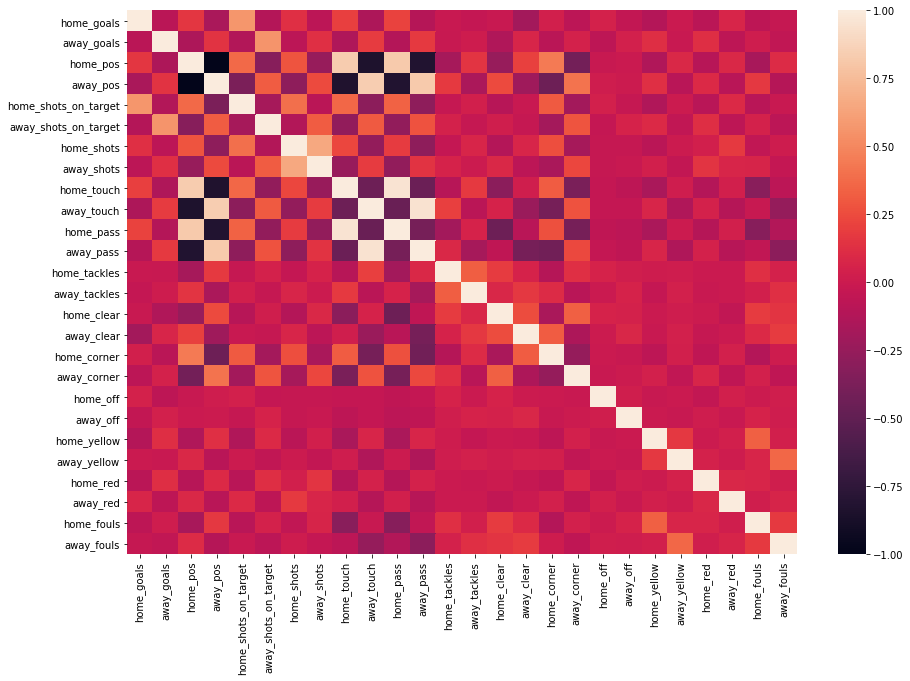

In [23]:
# Using heatmap for correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax)
plt.show()

# Datasets/Assigning Variables

In [24]:
#df2 will include "win" and "non loss" columns.
#Win - 0 for loss or tie for home team, 1 for win for home team
#Non loss - 0 for loss for home team, 1 for tie or win for home team

df2 = df.copy()

df2['win'] = df2['winner'].apply(lambda x: 1 if x == 1 else 0)
df2['non_loss'] = df2['winner'].apply(lambda x: 1 if x != 2 else 0)


"""#start at home_pos with win as y
X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]"""


"""#start at home_pos with non loss as y
X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]
y"""

'#start at home_pos with win as y\nX = df2.iloc[:,4:-3]\ny = df2.iloc[:,-2]'

'#start at home_pos with non loss as y\nX = df2.iloc[:,4:-3]\ny = df2.iloc[:,-1]\ny'

In [25]:
#df3 is df2 wihtout home and away team goals, but include home and away team numbers
#Win - 0 for loss or tie for home team, 1 for win for home team
#Non loss - 0 for loss for home team, 1 for tie or win for home team

df3 = df2.copy()

df3.drop(['home_goals', 'away_goals'],axis = 1, inplace = True)

"""#start at home_team with win as y
X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]"""



"""#start at home_team with non loss as y
X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]"""

'#start at home_team with win as y\nX = df3.iloc[:,:-3]\ny = df3.iloc[:,-2]'

'#start at home_team with non loss as y\nX = df3.iloc[:,:-3]\ny = df3.iloc[:,-1]'

In [26]:














#

# <div class="alert alert-block alert-info"> DF2-A </div>

In [27]:
# The DF2-A Dataset

# Independent Variable is 0 for a home loss or tie and 1 for a home win.

df2.iloc[:,4:-1].head()

,home_pos,away_pos,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touch,away_touch,home_pass,away_pass,home_tackles,away_tackles,home_clear,away_clear,home_corner,away_corner,home_off,away_off,home_yellow,away_yellow,home_red,away_red,home_fouls,away_fouls,winner,win
season,,,,,,,,,,,,,,,,,,,,,,,,,,
2006/2007,72.9,27.1,7,3,24,6,807,417,631,232,22,33,14,51,18,1,2,6,1,2,0,0,10,19,0,0
2006/2007,37.8,62.2,4,2,13,10,411,591,243,427,28,17,20,43,6,3,3,1,0,0,0,0,22,22,1,1
2006/2007,47.0,53.0,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,1,1
2006/2007,55.3,44.7,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,1,1
2006/2007,44.3,55.7,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,1,1


## DF for Scores

In [28]:
#rquares df

rsquaresdf2_A = pd.DataFrame()


#accuracy df

accuracydf2_A = pd.DataFrame()

# Multi Linear Regression

In [29]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

In [30]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [31]:
#import the model
from sklearn.linear_model import LinearRegression

In [32]:
my_model = LinearRegression().fit(X_train, y_train)

In [33]:
#prediction test
y_predict = my_model.predict(X_test)

#prediction train
y_predict_train = my_model.predict(X_train)

In [34]:
#accuracy metrics
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.32491967360646323
R Squared for training data is:  0.3518132287498601


In [35]:
#add to metrics df

rsquaresdf2_A['MLR'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]



# Regularized Regression - Ridge

In [36]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

In [37]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [38]:
#import the model
from sklearn.linear_model import Ridge

In [39]:
my_Ridge = Ridge(alpha = .45).fit(X_train, y_train)

In [40]:
#predict test
y_predict = my_Ridge.predict(X_test)

#predict train
y_predict_train = my_Ridge.predict(X_train)

In [41]:
#add to metrics df


#accuracy metrics
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.3179229504522537
R Squared for training data is:  0.35800740618931326


In [42]:
#add to metrics df

rsquaresdf2_A['Ridge'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Ridge + Feature Scaling (Normalization)

In [43]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

In [44]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
# Asigning Variables


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [45]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [46]:
#create an object of MinMaxScaler
scaler = MinMaxScaler()

In [47]:
#normalizing the data

#fitting
scaler.fit(X_train)

#transforming the x varaible
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [48]:
#create model with scaled data
my_ridge = Ridge(alpha = 7).fit(X_train_scaled, y_train)

In [49]:
#make predictions

#test data
y_predict = my_ridge.predict(X_test_scaled)

#train data
y_predict_train = my_ridge.predict(X_train_scaled)


In [50]:
#accuracy metrics
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.3290713260782716
R Squared for training data is:  0.32996504106981595


In [51]:
#add to metrics df

rsquaresdf2_A['Ridge - Feature Scale'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Ridge + Polynomial Features

In [52]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

In [53]:
#import polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [54]:
#Create an object
poly = PolynomialFeatures(degree=2)

#Create new features of X variable
X_poly = poly.fit_transform(X)

In [55]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [56]:
my_ridge = Ridge(alpha = .4).fit(X_train, y_train)

In [57]:
#predict test
y_predict = my_ridge.predict(X_test)

#predict train
y_predict_train = my_ridge.predict(X_train)

In [58]:
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.35437805642213027
R Squared for training data is:  0.34839322426524344


In [59]:
#add to metrics df

rsquaresdf2_A['Ridge - Poly Features'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Regularized Regression - Lasso

In [60]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

In [61]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Asigning Variables



In [62]:
#import the model
from sklearn.linear_model import Lasso

In [63]:
my_Lasso = Lasso(alpha = .15).fit(X_train, y_train)

In [64]:
#predict test
y_predict = my_Lasso.predict(X_test)

#predict_train
y_predict_train = my_Lasso.predict(X_train)

In [65]:
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.2790926089984217
R Squared for training data is:  0.28580710934762743


In [66]:
#add to metrics df

rsquaresdf2_A['Lasso'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Lasso + Feature Scaling (Normalization)

In [67]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

In [68]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [69]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [70]:
#create an object of MinMaxScaler
scaler = MinMaxScaler()

In [71]:
#normalizing the data

#fitting
scaler.fit(X_train)

#transforming the x varaible
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [72]:
#import the model
from sklearn.linear_model import Lasso

In [73]:
my_Lasso = Lasso(alpha = .8).fit(X_train_scaled, y_train)

In [74]:
#predict test
y_predict = my_Lasso.predict(X_test_scaled)

#predict_train
y_predict_train = my_Lasso.predict(X_train_scaled)

In [75]:
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  -0.0014536021076803074
R Squared for training data is:  0.0


In [76]:
#add to metrics df

rsquaresdf2_A['Lasso - Feature Scaling'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# KNN

In [77]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

In [78]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [79]:
#Normalizing (Feature Scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [80]:
#import model
from sklearn.neighbors import KNeighborsClassifier

## Paramater Tuning Code

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=34, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rates for different k-values')

Text(0.5, 0, 'k-value')

Text(0, 0.5, 'Mean Error')

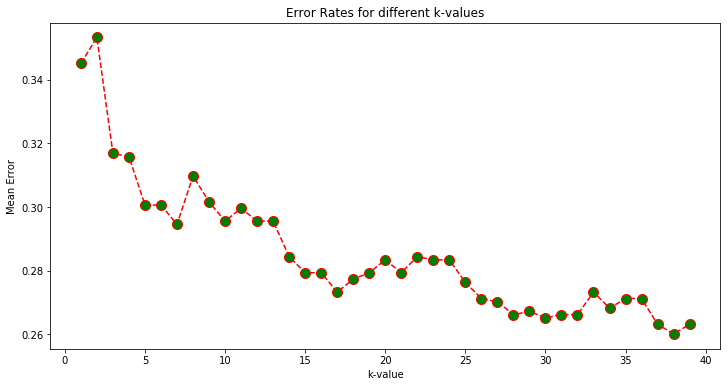

In [81]:
# Arbitrarily we chose k = 5 and it turns out to be a good choice. However, in reality we have to try mutiple values and select
# the best one. This is what we do here:

error = []

# calculate the error for k values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_y_i = knn.predict(X_test)
    error.append(np.mean(pred_y_i != y_test))
    
    
# Now, we can plot the errors
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color = 'red', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rates for different k-values')
plt.xlabel('k-value')
plt.ylabel('Mean Error')
plt.show()


In [82]:
#create an instance

My_KNN = KNeighborsClassifier(n_neighbors = 21) 
My_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [83]:
#predict test
y_predict = My_KNN.predict(X_test)

#predict train
y_predict_train = My_KNN.predict(X_train)

In [84]:
#accuracy score
from sklearn.metrics import accuracy_score

print('test data is: ', accuracy_score(y_test, y_predict))
print('training data is: ', accuracy_score(y_train, y_predict_train))

test data is:  0.7206477732793523
training data is:  0.7524050632911392


In [85]:
#add to metrics df

accuracydf2_A['KNN'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# DECISION TREE

In [86]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

In [87]:
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(X, y, test_size = .2)

from sklearn.tree import DecisionTreeClassifier

My_Tree = DecisionTreeClassifier(max_depth = 3 ,min_samples_leaf = 7)

My_Tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [88]:
# print accuracy scores

y_predict = My_Tree.predict(X_test)
y_predict_train = My_Tree.predict(X_train)

from sklearn.metrics import accuracy_score

print("test", accuracy_score(y_test, y_predict))
print("train", accuracy_score(y_train, y_predict_train))

test 0.7024291497975709
train 0.710379746835443


In [89]:
#add to metrics df

accuracydf2_A['Decision Tree'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


## SVM - Only for Binary

In [90]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

## SVM Parameter Tuning

In [91]:
c_parameters = [.1,.5,1,5]

for c in c_parameters:
   # splitting data
    from sklearn.model_selection import train_test_split as SPLIT

    X_train, X_test, y_train, y_test = SPLIT(X, y, test_size = .2)

    # Developing Model
    from sklearn.svm import SVC

    My_SVC = SVC(kernel = 'linear', C = c)

    My_SVC.fit(X_train, y_train)
    
    y_predict = My_SVC.predict(X_test)

    y_predict_train = My_SVC.predict(X_train)
    
    from sklearn.metrics import accuracy_score
    
    print(f'SVC accuracy Test Data {c} = ', accuracy_score(y_test, y_predict))

    print(f'SVC accuracy Training Data {c} = ', accuracy_score(y_train, y_predict_train))
    
    print('Error = :', round(abs(accuracy_score(y_test, y_predict) - accuracy_score(y_train, y_predict_train)),3))


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 0.1 =  0.7530364372469636
SVC accuracy Training Data 0.1 =  0.7731645569620254
Error = : 0.02


SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 0.5 =  0.7591093117408907
SVC accuracy Training Data 0.5 =  0.7681012658227848
Error = : 0.009


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 1 =  0.7550607287449392
SVC accuracy Training Data 1 =  0.7744303797468355
Error = : 0.019


SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 5 =  0.7763157894736842
SVC accuracy Training Data 5 =  0.7640506329113924
Error = : 0.012


In [92]:
# splitting data
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(X, y, test_size = .2)

# Developing Model
from sklearn.svm import SVC

My_SVC = SVC(kernel = 'linear', C = .1)

My_SVC.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
y_predict = My_SVC.predict(X_test)

y_predict_train = My_SVC.predict(X_train)

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
print('SVC accuracy on Test Data = ', accuracy_score(y_test, y_predict))

print('SVC accuracy on Training Data = ', accuracy_score(y_train, y_predict_train))


SVC accuracy on Test Data =  0.7844129554655871
SVC accuracy on Training Data =  0.7673417721518987


In [96]:
#add to metrics df

accuracydf2_A['SVM'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Dummy Classifier for SVC Model

In [97]:
y_binary_imbalanced = y.copy()

y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print ('Original labels:', y[1:30])

print ('New binary labels:', y_binary_imbalanced[1:30])

Original labels: season
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    0
2006/2007    1
Name: win, dtype: int64
New binary labels: season
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    0
2006/2007    1
Name: win, dtype: int64


In [98]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

#  The dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [99]:
print ("Accuracy score of Dummy Classifier = ", accuracy_score(y_test, y_dummy_predictions))

Accuracy score of Dummy Classifier =  0.5323886639676113


# GNB

In [100]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

In [101]:
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(X, y)

In [102]:
# Import Libraries
# from sklear.naive_bayes import GaussianNB

from sklearn.naive_bayes import GaussianNB

My_GNB = GaussianNB().fit(X_train,y_train)


In [103]:
# make prediction on training and test data 
y_predict = My_GNB.predict(X_test)
y_predict_train = My_GNB.predict(X_train)


#accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy Test = ", accuracy_score(y_test, y_predict))
print("Accuracy Train = ", accuracy_score(y_train, y_predict_train))

Accuracy Test =  0.6242914979757085
Accuracy Train =  0.6292195517148258


In [104]:
#add to metrics df

accuracydf2_A['GNB'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Random Forest

In [105]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

In [106]:
# import RandomForestClassifier from sklearn.ensemble module

from sklearn.ensemble import RandomForestClassifier as FOREST

k = 10

My_Forest = FOREST(max_depth = 4 ,min_samples_leaf = 10, max_features = k).fit(X_train, y_train)


In [107]:
y_predict = My_Forest.predict(X_test)
y_predict_train = My_Forest.predict(X_train)

print('Test', accuracy_score(y_test, y_predict))
print('Train', accuracy_score(y_train, y_predict_train))

Test 0.7263157894736842
Train 0.7491223332433162


In [108]:
#add to metrics df

accuracydf2_A['Rand Forest'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Gradient Boosted Decision Trees

In [109]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

In [110]:
# Import Libraries
# from sklear.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBDT

# set the random_state = 0
My_GBDT = GBDT().fit(X_train, y_train)

In [111]:
from sklearn.metrics import accuracy_score

# make prediction on training and test data 

y_pred = My_GBDT.predict(X_test)

y_pred_train = My_GBDT.predict(X_train)

# print accuracy_score for your predictions
print ("Accuracy Score on Test Data = ", accuracy_score(y_test, y_pred))
print ("Accuracy Score on Train Data = ", accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data =  0.7578947368421053
Accuracy Score on Train Data =  0.8096138266270592


In [112]:
# set the values for learning_rate and max_depth to control the performance of the algorithm
# ReDo it for different values

My_GBDT_2 = GBDT(learning_rate = .1, max_depth = 2).fit(X_train, y_train)

In [113]:
# make prediction on training and test data 

y_pred = My_GBDT_2.predict(X_test)

y_pred_train = My_GBDT_2.predict(X_train)

# print accuracy_score for your predictions
print ("Accuracy Score on Test Data = ", accuracy_score(y_test, y_pred))
print ("Accuracy Score on Train Data = ", accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data =  0.7643724696356275
Accuracy Score on Train Data =  0.7799081825546854


In [114]:
#add to metrics df

accuracydf2_A['GB Dec Tree'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Artificial Neural Network

In [115]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-2]

In [116]:
# Import Libraries

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

## ANN Paramater Tuning

In [117]:
a_parameters = [1, 3, 5, 10]

for a in a_parameters:

    
    # Scale Data

    Scaler = MinMaxScaler()

    X_train_scaled = Scaler.fit_transform(X_train)
    X_test_scaled = Scaler.transform(X_test)

    # Build Model
    My_ANN = MLPClassifier(activation = 'tanh', hidden_layer_sizes = [10, 10], alpha = a, solver = 'lbfgs').fit(X_train_scaled, y_train)

    # make prediction on training and test data 

    y_pred = My_ANN.predict(X_test_scaled)

    y_pred_train = My_ANN.predict(X_train_scaled)

    # print accuracy_score for your predictions
    print (f"Accuracy Score on Test Data = {a} ", accuracy_score(y_test, y_pred))
    print (f"Accuracy Score on Train Data = {a}", accuracy_score(y_train, y_pred_train))
    print(f'Error {a} = :', accuracy_score(y_test, y_pred) - accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data = 1  0.7724696356275303
Accuracy Score on Train Data = 1 0.7812584391034296
Error 1 = : -0.008788803475899276
Accuracy Score on Test Data = 3  0.7748987854251013
Accuracy Score on Train Data = 3 0.7780178233864434
Error 3 = : -0.0031190379613421637
Accuracy Score on Test Data = 5  0.7781376518218623
Accuracy Score on Train Data = 5 0.7753173102889549
Error 5 = : 0.0028203415329074444
Accuracy Score on Test Data = 10  0.7676113360323886
Accuracy Score on Train Data = 10 0.7672157709964893
Error 10 = : 0.0003955650358993257


In [118]:
# Scale Data

Scaler = MinMaxScaler()

X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [119]:
# Build Model
My_ANN = MLPClassifier(activation = 'tanh', hidden_layer_sizes = [10, 10], alpha = 3, solver = 'lbfgs').fit(X_train_scaled, y_train)

In [120]:
# make prediction on training and test data 

y_pred = My_ANN.predict(X_test_scaled)

y_pred_train = My_ANN.predict(X_train_scaled)

# print accuracy_score for your predictions
print ("Accuracy Score on Test Data = ", accuracy_score(y_test, y_pred))
print ("Accuracy Score on Train Data = ", accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data =  0.7781376518218623
Accuracy Score on Train Data =  0.77882797731569


In [121]:
# Add results to metrics df

accuracydf2_A['ANN'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]

In [122]:
rsquaresdf2_A.rename(index = {0: "Test", 1:"Train"}, inplace = True)
rsquaresdf2_A

,MLR,Ridge,Ridge - Feature Scale,Ridge - Poly Features,Lasso,Lasso - Feature Scaling
Test,0.324920,0.317923,0.329071,0.354378,0.279093,-0.001454
Train,0.351813,0.358007,0.329965,0.348393,0.285807,0.000000


In [123]:
accuracydf2_A.rename(index = {0: "Test", 1:"Train"}, inplace = True)
accuracydf2_A

,KNN,Decision Tree,SVM,GNB,Rand Forest,GB Dec Tree,ANN
Test,0.720648,0.702429,0.784413,0.624291,0.726316,0.726316,0.726316
Train,0.752405,0.710380,0.767342,0.629220,0.749122,0.749122,0.749122


# Cross-Validation

In [124]:
# Multi Linear Regression
CV_scores = cross_val_score(my_model, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.27482295 0.2936357  0.33618223 0.3650744  0.27885834 0.40334534
 0.34544882 0.31671863 0.39237692 0.39174691]
Average CV_Score =  0.33982102214396315


In [125]:
# Ridge Regression
CV_scores = cross_val_score(my_Ridge, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.27483408 0.2936342  0.33618515 0.365069   0.27884394 0.40335546
 0.34543869 0.31670806 0.39239668 0.39175081]
Average CV_Score =  0.33982160695447333


In [126]:
# Ridge + Feature Scaling 
# Same Code for Ridge + Polynomial Features
CV_scores = cross_val_score(my_ridge, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.27483284 0.29363437 0.33618483 0.3650696  0.27884554 0.40335434
 0.34543981 0.31670923 0.39239449 0.39175038]
Average CV_Score =  0.33982154406425297


In [127]:
# Lasso
# Same Code for Lasso + Feature Scaling
CV_scores = cross_val_score(my_Lasso, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.11177818 0.09274462 0.10098983 0.10648778 0.10009977 0.12929607
 0.08605656 0.05002369 0.11611393 0.12869043]
Average CV_Score =  0.1022280850487975


In [128]:
# KNN 
CV_scores = cross_val_score(My_KNN, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.58299595 0.57692308 0.60323887 0.61336032 0.6417004  0.59716599
 0.63157895 0.60323887 0.61054767 0.63488844]
Average CV_Score =  0.6095638534626471


In [129]:
# Decision Tree
CV_scores = cross_val_score(My_Tree, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.69635628 0.66396761 0.66396761 0.70850202 0.70850202 0.73076923
 0.68016194 0.68825911 0.73427992 0.71196755]
Average CV_Score =  0.6986733294462557


In [130]:
# SVM
CV_scores = cross_val_score(My_SVC, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.73279352 0.7388664  0.75708502 0.79352227 0.7611336  0.78340081
 0.76720648 0.7854251  0.78498986 0.77484787]
Average CV_Score =  0.7679270926575292


In [131]:
# GNB
CV_scores = cross_val_score(My_GNB, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.62145749 0.67206478 0.69635628 0.62348178 0.6194332  0.6659919
 0.62753036 0.60323887 0.62068966 0.62271805]
Average CV_Score =  0.6372962363781195


In [132]:
#Random Forest
CV_scores = cross_val_score(My_Forest, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))


CV_scores are :  [0.73076923 0.70040486 0.72469636 0.7388664  0.7145749  0.7611336
 0.72672065 0.71659919 0.76673428 0.73630832]
Average CV_Score =  0.7316807778535119


In [133]:
#Gradient Boosted 
CV_scores = cross_val_score(My_GBDT, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.73684211 0.7145749  0.73481781 0.76923077 0.73684211 0.7854251
 0.7611336  0.74291498 0.78498986 0.76267748]
Average CV_Score =  0.7529448719317408


In [134]:














#

# <div class="alert alert-block alert-info"> DF2-B </div>

In [135]:
# The DF2-B Dataset

# Independent Variable is 0 for a home loss and 1 for a home win or tie.

df2.iloc[:,4:].head()

,home_pos,away_pos,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touch,away_touch,home_pass,away_pass,home_tackles,away_tackles,home_clear,away_clear,home_corner,away_corner,home_off,away_off,home_yellow,away_yellow,home_red,away_red,home_fouls,away_fouls,winner,win,non_loss
season,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006/2007,72.9,27.1,7,3,24,6,807,417,631,232,22,33,14,51,18,1,2,6,1,2,0,0,10,19,0,0,1
2006/2007,37.8,62.2,4,2,13,10,411,591,243,427,28,17,20,43,6,3,3,1,0,0,0,0,22,22,1,1,1
2006/2007,47.0,53.0,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,1,1,1
2006/2007,55.3,44.7,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,1,1,1
2006/2007,44.3,55.7,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,1,1,1


## DF for Scores

In [136]:
#rquares df

rsquaresdf2_B = pd.DataFrame()


#accuracy df

accuracydf2_B = pd.DataFrame()

# Multi Linear Regression

In [137]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

In [138]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [139]:
#import the model
from sklearn.linear_model import LinearRegression

In [140]:
my_model = LinearRegression().fit(X_train, y_train)

In [141]:
#prediction test
y_predict = my_model.predict(X_test)

#prediction train
y_predict_train = my_model.predict(X_train)

In [142]:
#accuracy metrics
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.29751852685909097
R Squared for training data is:  0.3181740407721999


In [143]:
#add to metrics df

rsquaresdf2_B['MLR'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]



# Regularized Regression - Ridge

In [144]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

In [145]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [146]:
#import the model
from sklearn.linear_model import Ridge

In [147]:
my_Ridge = Ridge(alpha = .45).fit(X_train, y_train)

In [148]:
#predict test
y_predict = my_Ridge.predict(X_test)

#predict train
y_predict_train = my_Ridge.predict(X_train)

In [149]:
#add to metrics df


#accuracy metrics
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.30374790551216524
R Squared for training data is:  0.31721685141370537


In [150]:
#add to metrics df

rsquaresdf2_B['Ridge'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Ridge + Feature Scaling (Normalization)

In [151]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

In [152]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
# Asigning Variables


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [153]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [154]:
#create an object of MinMaxScaler
scaler = MinMaxScaler()

In [155]:
#normalizing the data

#fitting
scaler.fit(X_train)

#transforming the x varaible
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [156]:
#create model with scaled data
my_ridge = Ridge(alpha = 7).fit(X_train_scaled, y_train)

In [157]:
#make predictions

#test data
y_predict = my_ridge.predict(X_test_scaled)

#train data
y_predict_train = my_ridge.predict(X_train_scaled)


In [158]:
#accuracy metrics
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.2800905217616154
R Squared for training data is:  0.3047751574296974


In [159]:
#add to metrics df

rsquaresdf2_B['Ridge - Feature Scale'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Ridge + Polynomial Features

In [160]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

In [161]:
#import polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [162]:
#Create an object
poly = PolynomialFeatures(degree=2)

#Create new features of X variable
X_poly = poly.fit_transform(X)

In [163]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [164]:
my_ridge = Ridge(alpha = .4).fit(X_train, y_train)

In [165]:
#predict test
y_predict = my_ridge.predict(X_test)

#predict train
y_predict_train = my_ridge.predict(X_train)

In [166]:
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.2832478818413502
R Squared for training data is:  0.3225534401802296


In [167]:
#add to metrics df

rsquaresdf2_B['Ridge - Poly Features'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Regularized Regression - Lasso

In [168]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

In [169]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Asigning Variables



In [170]:
#import the model
from sklearn.linear_model import Lasso

In [171]:
my_Lasso = Lasso(alpha = .15).fit(X_train, y_train)

In [172]:
#predict test
y_predict = my_Lasso.predict(X_test)

#predict_train
y_predict_train = my_Lasso.predict(X_train)

In [173]:
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.21723223608172382
R Squared for training data is:  0.25178798552776316


In [174]:
#add to metrics df

rsquaresdf2_B['Lasso'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Lasso + Feature Scaling (Normalization)

In [175]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

In [176]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [177]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [178]:
#create an object of MinMaxScaler
scaler = MinMaxScaler()

In [179]:
#normalizing the data

#fitting
scaler.fit(X_train)

#transforming the x varaible
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [180]:
#import the model
from sklearn.linear_model import Lasso

In [181]:
my_Lasso = Lasso(alpha = .8).fit(X_train_scaled, y_train)

In [182]:
#predict test
y_predict = my_Lasso.predict(X_test_scaled)

#predict_train
y_predict_train = my_Lasso.predict(X_train_scaled)

In [183]:
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  -0.0011804272299518193
R Squared for training data is:  0.0


In [184]:
#add to metrics df

rsquaresdf2_B['Lasso - Feature Scaling'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# KNN

In [185]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

In [186]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [187]:
#Normalizing (Feature Scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [188]:
#import model
from sklearn.neighbors import KNeighborsClassifier

## Paramater Tuning Code

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=34, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rates for different k-values')

Text(0.5, 0, 'k-value')

Text(0, 0.5, 'Mean Error')

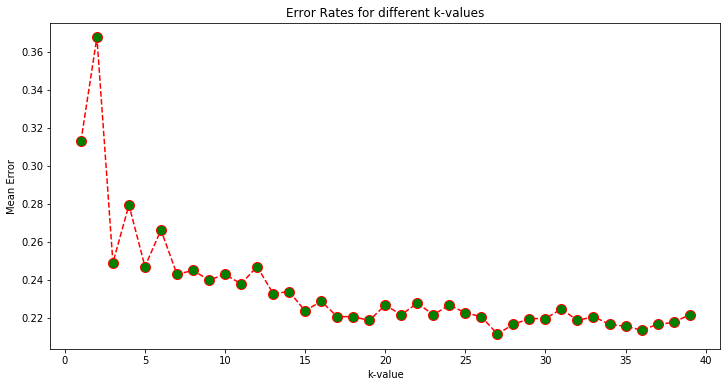

In [189]:
# Arbitrarily we chose k = 5 and it turns out to be a good choice. However, in reality we have to try mutiple values and select
# the best one. This is what we do here:

error = []

# calculate the error for k values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_y_i = knn.predict(X_test)
    error.append(np.mean(pred_y_i != y_test))
    
    
# Now, we can plot the errors
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color = 'red', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rates for different k-values')
plt.xlabel('k-value')
plt.ylabel('Mean Error')
plt.show()


In [190]:
#create an instance

My_KNN = KNeighborsClassifier(n_neighbors = 36) 
My_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                     weights='uniform')

In [191]:
#predict test
y_predict = My_KNN.predict(X_test)

#predict train
y_predict_train = My_KNN.predict(X_train)

In [192]:
#accuracy score
from sklearn.metrics import accuracy_score

print('test data is: ', accuracy_score(y_test, y_predict))
print('training data is: ', accuracy_score(y_train, y_predict_train))

test data is:  0.7864372469635628
training data is:  0.7855696202531646


In [193]:
#add to metrics df

accuracydf2_B['KNN'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# DECISION TREE

In [194]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

In [195]:
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(X, y, test_size = .2)

from sklearn.tree import DecisionTreeClassifier

My_Tree = DecisionTreeClassifier(max_depth = 3 ,min_samples_leaf = 7)

My_Tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [196]:
# print accuracy scores

y_predict = My_Tree.predict(X_test)
y_predict_train = My_Tree.predict(X_train)

from sklearn.metrics import accuracy_score

print("test", accuracy_score(y_test, y_predict))
print("train", accuracy_score(y_train, y_predict_train))

test 0.7479757085020243
train 0.7526582278481012


In [197]:
#add to metrics df

accuracydf2_B['Decision Tree'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


## SVM - Only for Binary

In [198]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

## SVM Parameter Tuning

In [199]:
c_parameters = [.1,.5,1,5]

for c in c_parameters:
   # splitting data
    from sklearn.model_selection import train_test_split as SPLIT

    X_train, X_test, y_train, y_test = SPLIT(X, y, test_size = .2)

    # Developing Model
    from sklearn.svm import SVC

    My_SVC = SVC(kernel = 'linear', C = c)

    My_SVC.fit(X_train, y_train)
    
    y_predict = My_SVC.predict(X_test)

    y_predict_train = My_SVC.predict(X_train)
    
    from sklearn.metrics import accuracy_score
    
    print(f'SVC accuracy Test Data {c} = ', accuracy_score(y_test, y_predict))

    print(f'SVC accuracy Training Data {c} = ', accuracy_score(y_train, y_predict_train))
    
    print('Error = :', round(abs(accuracy_score(y_test, y_predict) - accuracy_score(y_train, y_predict_train)),3))


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 0.1 =  0.805668016194332
SVC accuracy Training Data 0.1 =  0.809620253164557
Error = : 0.004


SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 0.5 =  0.791497975708502
SVC accuracy Training Data 0.5 =  0.8129113924050633
Error = : 0.021


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 1 =  0.7935222672064778
SVC accuracy Training Data 1 =  0.8075949367088607
Error = : 0.014


SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 5 =  0.8066801619433198
SVC accuracy Training Data 5 =  0.8070886075949367
Error = : 0.0


In [200]:
# splitting data
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(X, y, test_size = .2)

# Developing Model
from sklearn.svm import SVC

My_SVC = SVC(kernel = 'linear', C = .1)

My_SVC.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [201]:
y_predict = My_SVC.predict(X_test)

y_predict_train = My_SVC.predict(X_train)

In [202]:
from sklearn.metrics import accuracy_score

In [203]:
print('SVC accuracy on Test Data = ', accuracy_score(y_test, y_predict))

print('SVC accuracy on Training Data = ', accuracy_score(y_train, y_predict_train))


SVC accuracy on Test Data =  0.8036437246963563
SVC accuracy on Training Data =  0.810126582278481


In [204]:
#add to metrics df

accuracydf2_B['SVM'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Dummy Classifier for SVC Model

In [205]:
y_binary_imbalanced = y.copy()

y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print ('Original labels:', y[1:30])

print ('New binary labels:', y_binary_imbalanced[1:30])

Original labels: season
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
Name: non_loss, dtype: int64
New binary labels: season
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
Name: non_loss, dtype: int64


In [206]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

#  The dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [207]:
print ("Accuracy score of Dummy Classifier = ", accuracy_score(y_test, y_dummy_predictions))

Accuracy score of Dummy Classifier =  0.7176113360323887


# GNB

In [208]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

In [209]:
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(X, y)

In [210]:
# Import Libraries
# from sklear.naive_bayes import GaussianNB

from sklearn.naive_bayes import GaussianNB

My_GNB = GaussianNB().fit(X_train,y_train)


In [211]:
# make prediction on training and test data 
y_predict = My_GNB.predict(X_test)
y_predict_train = My_GNB.predict(X_train)


#accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy Test = ", accuracy_score(y_test, y_predict))
print("Accuracy Train = ", accuracy_score(y_train, y_predict_train))

Accuracy Test =  0.6615384615384615
Accuracy Train =  0.6686470429381582


In [212]:
#add to metrics df

accuracydf2_B['GNB'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Random Forest

In [213]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

In [214]:
# import RandomForestClassifier from sklearn.ensemble module

from sklearn.ensemble import RandomForestClassifier as FOREST

k = 10

My_Forest = FOREST(max_depth = 4 ,min_samples_leaf = 10, max_features = k).fit(X_train, y_train)


In [215]:
y_predict = My_Forest.predict(X_test)
y_predict_train = My_Forest.predict(X_train)

print('Test', accuracy_score(y_test, y_predict))
print('Train', accuracy_score(y_train, y_predict_train))

Test 0.7805668016194331
Train 0.7863894139886578


In [216]:
#add to metrics df

accuracydf2_B['Rand Forest'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Gradient Boosted Decision Trees

In [217]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

In [218]:
# Import Libraries
# from sklear.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBDT

# set the random_state = 0
My_GBDT = GBDT().fit(X_train, y_train)

In [219]:
from sklearn.metrics import accuracy_score

# make prediction on training and test data 

y_pred = My_GBDT.predict(X_test)

y_pred_train = My_GBDT.predict(X_train)

# print accuracy_score for your predictions
print ("Accuracy Score on Test Data = ", accuracy_score(y_test, y_pred))
print ("Accuracy Score on Train Data = ", accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data =  0.7951417004048583
Accuracy Score on Train Data =  0.8441803942749122


In [220]:
# set the values for learning_rate and max_depth to control the performance of the algorithm
# ReDo it for different values

My_GBDT_2 = GBDT(learning_rate = .1, max_depth = 2).fit(X_train, y_train)

In [221]:
# make prediction on training and test data 

y_pred = My_GBDT_2.predict(X_test)

y_pred_train = My_GBDT_2.predict(X_train)

# print accuracy_score for your predictions
print ("Accuracy Score on Test Data = ", accuracy_score(y_test, y_pred))
print ("Accuracy Score on Train Data = ", accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data =  0.7959514170040486
Accuracy Score on Train Data =  0.8174453146097759


In [222]:
#add to metrics df

accuracydf2_B['GB Dec Tree'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Artificial Neural Network

In [223]:
# Asigning Variables

X = df2.iloc[:,4:-3]
y = df2.iloc[:,-1]

In [224]:
# Import Libraries

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

## ANN Paramater Tuning

In [225]:
a_parameters = [1, 3, 5, 10]

for a in a_parameters:

    
    # Scale Data

    Scaler = MinMaxScaler()

    X_train_scaled = Scaler.fit_transform(X_train)
    X_test_scaled = Scaler.transform(X_test)

    # Build Model
    My_ANN = MLPClassifier(activation = 'tanh', hidden_layer_sizes = [10, 10], alpha = a, solver = 'lbfgs').fit(X_train_scaled, y_train)

    # make prediction on training and test data 

    y_pred = My_ANN.predict(X_test_scaled)

    y_pred_train = My_ANN.predict(X_train_scaled)

    # print accuracy_score for your predictions
    print (f"Accuracy Score on Test Data = {a} ", accuracy_score(y_test, y_pred))
    print (f"Accuracy Score on Train Data = {a}", accuracy_score(y_train, y_pred_train))
    print(f'Error {a} = :', accuracy_score(y_test, y_pred) - accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data = 1  0.8040485829959514
Accuracy Score on Train Data = 1 0.819065622468269
Error 1 = : -0.015017039472317584
Accuracy Score on Test Data = 3  0.8064777327935223
Accuracy Score on Train Data = 3 0.8147448015122873
Error 3 = : -0.008267068718765036
Accuracy Score on Test Data = 5  0.8089068825910931
Accuracy Score on Train Data = 5 0.8139346475830408
Error 5 = : -0.005027764991947681
Accuracy Score on Test Data = 10  0.8048582995951417
Accuracy Score on Train Data = 10 0.8088036726978126
Error 10 = : -0.003945373102670957


In [226]:
# Scale Data

Scaler = MinMaxScaler()

X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [227]:
# Build Model
My_ANN = MLPClassifier(activation = 'tanh', hidden_layer_sizes = [10, 10], alpha = 3, solver = 'lbfgs').fit(X_train_scaled, y_train)

In [228]:
# make prediction on training and test data 

y_pred = My_ANN.predict(X_test_scaled)

y_pred_train = My_ANN.predict(X_train_scaled)

# print accuracy_score for your predictions
print ("Accuracy Score on Test Data = ", accuracy_score(y_test, y_pred))
print ("Accuracy Score on Train Data = ", accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data =  0.8040485829959514
Accuracy Score on Train Data =  0.8144747502025385


In [229]:
# Add results to metrics df

accuracydf2_B['ANN'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]

In [230]:
rsquaresdf2_B.rename(index = {0: "Test", 1:"Train"}, inplace = True)
rsquaresdf2_B

,MLR,Ridge,Ridge - Feature Scale,Ridge - Poly Features,Lasso,Lasso - Feature Scaling
Test,0.297519,0.303748,0.280091,0.283248,0.217232,-0.00118
Train,0.318174,0.317217,0.304775,0.322553,0.251788,0.00000


In [231]:
accuracydf2_B.rename(index = {0: "Test", 1:"Train"}, inplace = True)
accuracydf2_B

,KNN,Decision Tree,SVM,GNB,Rand Forest,GB Dec Tree,ANN
Test,0.786437,0.747976,0.803644,0.661538,0.780567,0.780567,0.780567
Train,0.785570,0.752658,0.810127,0.668647,0.786389,0.786389,0.786389


# Cross-Validation

In [232]:
# Multi Linear Regression
CV_scores = cross_val_score(my_model, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.26510484 0.27039743 0.25441393 0.29029931 0.28185361 0.31324953
 0.28487869 0.32632037 0.38820082 0.32953173]
Average CV_Score =  0.300425025700345


In [233]:
# Ridge Regression
CV_scores = cross_val_score(my_Ridge, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.26513266 0.27040392 0.25441709 0.29030412 0.28181458 0.31326955
 0.28486763 0.32631439 0.38820705 0.32953115]
Average CV_Score =  0.3004262132513581


In [234]:
# Ridge + Feature Scaling 
# Same Code for Ridge + Polynomial Features
CV_scores = cross_val_score(my_ridge, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.26512957 0.2704032  0.25441674 0.29030359 0.28181891 0.31326734
 0.28486886 0.32631505 0.38820636 0.32953121]
Average CV_Score =  0.3004260839609176


In [235]:
# Lasso
# Same Code for Lasso + Feature Scaling
CV_scores = cross_val_score(my_Lasso, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.09197496 0.08988404 0.07940072 0.0449511  0.07718988 0.07852233
 0.05956497 0.06022491 0.12094654 0.11303438]
Average CV_Score =  0.08156938391474912


In [236]:
# KNN 
CV_scores = cross_val_score(My_KNN, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.72267206 0.73279352 0.71659919 0.72064777 0.72469636 0.72064777
 0.71659919 0.71862348 0.73833671 0.71805274]
Average CV_Score =  0.7229668804559378


In [237]:
# Decision Tree
CV_scores = cross_val_score(My_Tree, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.7388664  0.75101215 0.75506073 0.74898785 0.75101215 0.74898785
 0.73076923 0.74493927 0.80121704 0.74442191]
Average CV_Score =  0.751527457276363


In [238]:
# SVM
CV_scores = cross_val_score(My_SVC, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.80769231 0.77935223 0.8097166  0.80769231 0.81174089 0.77530364
 0.80364372 0.81781377 0.8356998  0.81744422]
Average CV_Score =  0.8066099481814225


In [239]:
# GNB
CV_scores = cross_val_score(My_GNB, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.73481781 0.70040486 0.74696356 0.62955466 0.64979757 0.64574899
 0.6437247  0.64574899 0.65720081 0.64908722]
Average CV_Score =  0.67030491660576


In [240]:
#Random Forest
CV_scores = cross_val_score(My_Forest, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))


CV_scores are :  [0.74696356 0.75708502 0.74291498 0.78137652 0.76923077 0.77732794
 0.76518219 0.79352227 0.82758621 0.79513185]
Average CV_Score =  0.7756321291604734


In [241]:
#Gradient Boosted 
CV_scores = cross_val_score(My_GBDT, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.78744939 0.78744939 0.78340081 0.77732794 0.81578947 0.76923077
 0.80566802 0.80566802 0.8356998  0.81338742]
Average CV_Score =  0.7981071026763351


In [242]:














#

# <div class="alert alert-block alert-info"> DF3-A </div>

In [243]:
# The DF3-A Dataset

# Independent Variable is 0 for a home loss or tie and 1 for a home win.

df3.iloc[:,:-1].head()

,home_team,away_team,home_pos,away_pos,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touch,away_touch,home_pass,away_pass,home_tackles,away_tackles,home_clear,away_clear,home_corner,away_corner,home_off,away_off,home_yellow,away_yellow,home_red,away_red,home_fouls,away_fouls,winner,win
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006/2007,1,13,72.9,27.1,7,3,24,6,807,417,631,232,22,33,14,51,18,1,2,6,1,2,0,0,10,19,0,0
2006/2007,2,11,37.8,62.2,4,2,13,10,411,591,243,427,28,17,20,43,6,3,3,1,0,0,0,0,22,22,1,1
2006/2007,3,12,47.0,53.0,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,1,1
2006/2007,4,20,55.3,44.7,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,1,1
2006/2007,5,14,44.3,55.7,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,1,1


## DF for Scores

In [244]:
#rquares df

rsquaresdf3_A = pd.DataFrame()


#accuracy df

accuracydf3_A = pd.DataFrame()

# Multi Linear Regression

In [245]:
# Asigning Variables
X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

In [246]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [247]:
#import the model
from sklearn.linear_model import LinearRegression

In [248]:
my_model = LinearRegression().fit(X_train, y_train)

In [249]:
#prediction test
y_predict = my_model.predict(X_test)

#prediction train
y_predict_train = my_model.predict(X_train)

In [250]:
#accuracy metrics
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.3954916066610725
R Squared for training data is:  0.3481017386963331


In [251]:
#add to metrics df

rsquaresdf3_A['MLR'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]



# Regularized Regression - Ridge

In [252]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

In [253]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [254]:
#import the model
from sklearn.linear_model import Ridge

In [255]:
my_Ridge = Ridge(alpha = .45).fit(X_train, y_train)

In [256]:
#predict test
y_predict = my_Ridge.predict(X_test)

#predict train
y_predict_train = my_Ridge.predict(X_train)

In [257]:
#add to metrics df


#accuracy metrics
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.36795839592348956
R Squared for training data is:  0.35491815108593416


In [258]:
#add to metrics df

rsquaresdf3_A['Ridge'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Ridge + Feature Scaling (Normalization)

In [259]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

In [260]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
# Asigning Variables


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [261]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [262]:
#create an object of MinMaxScaler
scaler = MinMaxScaler()

In [263]:
#normalizing the data

#fitting
scaler.fit(X_train)

#transforming the x varaible
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [264]:
#create model with scaled data
my_ridge = Ridge(alpha = 7).fit(X_train_scaled, y_train)

In [265]:
#make predictions

#test data
y_predict = my_ridge.predict(X_test_scaled)

#train data
y_predict_train = my_ridge.predict(X_train_scaled)


In [266]:
#accuracy metrics
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.32324825709405913
R Squared for training data is:  0.3422023036923828


In [267]:
#add to metrics df

rsquaresdf3_A['Ridge - Feature Scale'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Ridge + Polynomial Features

In [268]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

In [269]:
#import polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [270]:
#Create an object
poly = PolynomialFeatures(degree=2)

#Create new features of X variable
X_poly = poly.fit_transform(X)

In [271]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [272]:
my_ridge = Ridge(alpha = .4).fit(X_train, y_train)

In [273]:
#predict test
y_predict = my_ridge.predict(X_test)

#predict train
y_predict_train = my_ridge.predict(X_train)

In [274]:
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.38245083698736415
R Squared for training data is:  0.35118360636142365


In [275]:
#add to metrics df

rsquaresdf3_A['Ridge - Poly Features'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Regularized Regression - Lasso

In [276]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

In [277]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Asigning Variables



In [278]:
#import the model
from sklearn.linear_model import Lasso

In [279]:
my_Lasso = Lasso(alpha = .15).fit(X_train, y_train)

In [280]:
#predict test
y_predict = my_Lasso.predict(X_test)

#predict_train
y_predict_train = my_Lasso.predict(X_train)

In [281]:
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.2953442061810996
R Squared for training data is:  0.28457671735212


In [282]:
#add to metrics df

rsquaresdf3_A['Lasso'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Lasso + Feature Scaling (Normalization)

In [283]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

In [284]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [285]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [286]:
#create an object of MinMaxScaler
scaler = MinMaxScaler()

In [287]:
#normalizing the data

#fitting
scaler.fit(X_train)

#transforming the x varaible
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [288]:
#import the model
from sklearn.linear_model import Lasso

In [289]:
my_Lasso = Lasso(alpha = .8).fit(X_train_scaled, y_train)

In [290]:
#predict test
y_predict = my_Lasso.predict(X_test_scaled)

#predict_train
y_predict_train = my_Lasso.predict(X_train_scaled)

In [291]:
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  -0.0010905864254822095
R Squared for training data is:  0.0


In [292]:
#add to metrics df

rsquaresdf3_A['Lasso - Feature Scaling'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# KNN

In [293]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

In [294]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [295]:
#Normalizing (Feature Scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [296]:
#import model
from sklearn.neighbors import KNeighborsClassifier

## Paramater Tuning Code

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=34, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rates for different k-values')

Text(0.5, 0, 'k-value')

Text(0, 0.5, 'Mean Error')

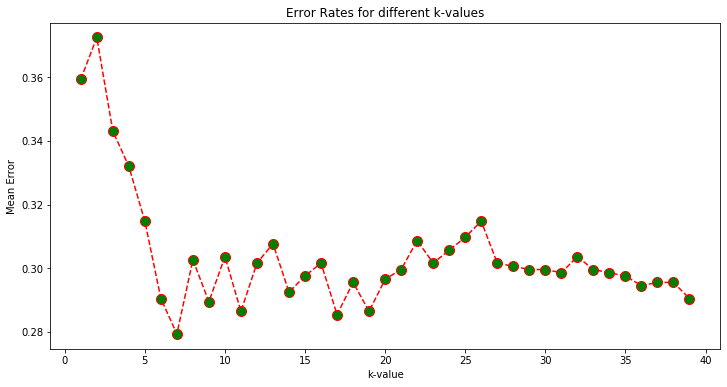

In [297]:
# Arbitrarily we chose k = 5 and it turns out to be a good choice. However, in reality we have to try mutiple values and select
# the best one. This is what we do here:

error = []

# calculate the error for k values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_y_i = knn.predict(X_test)
    error.append(np.mean(pred_y_i != y_test))
    
    
# Now, we can plot the errors
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color = 'red', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rates for different k-values')
plt.xlabel('k-value')
plt.ylabel('Mean Error')
plt.show()


In [298]:
#create an instance

My_KNN = KNeighborsClassifier(n_neighbors = 23) 
My_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [299]:
#predict test
y_predict = My_KNN.predict(X_test)

#predict train
y_predict_train = My_KNN.predict(X_train)

In [300]:
#accuracy score
from sklearn.metrics import accuracy_score

print('test data is: ', accuracy_score(y_test, y_predict))
print('training data is: ', accuracy_score(y_train, y_predict_train))

test data is:  0.6983805668016194
training data is:  0.7437974683544304


In [301]:
#add to metrics df

accuracydf3_A['KNN'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# DECISION TREE

In [302]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

In [303]:
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(X, y, test_size = .2)

from sklearn.tree import DecisionTreeClassifier

My_Tree = DecisionTreeClassifier(max_depth = 3 ,min_samples_leaf = 7)

My_Tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [304]:
# print accuracy scores

y_predict = My_Tree.predict(X_test)
y_predict_train = My_Tree.predict(X_train)

from sklearn.metrics import accuracy_score

print("test", accuracy_score(y_test, y_predict))
print("train", accuracy_score(y_train, y_predict_train))

test 0.6983805668016194
train 0.7151898734177216


In [305]:
#add to metrics df

accuracydf3_A['Decision Tree'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


## SVM - Only for Binary

In [306]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

## SVM Parameter Tuning

In [307]:
c_parameters = [.1,.5,1,5]

for c in c_parameters:
   # splitting data
    from sklearn.model_selection import train_test_split as SPLIT

    X_train, X_test, y_train, y_test = SPLIT(X, y, test_size = .2)

    # Developing Model
    from sklearn.svm import SVC

    My_SVC = SVC(kernel = 'linear', C = c)

    My_SVC.fit(X_train, y_train)
    
    y_predict = My_SVC.predict(X_test)

    y_predict_train = My_SVC.predict(X_train)
    
    from sklearn.metrics import accuracy_score
    
    print(f'SVC accuracy Test Data {c} = ', accuracy_score(y_test, y_predict))

    print(f'SVC accuracy Training Data {c} = ', accuracy_score(y_train, y_predict_train))
    
    print('Error = :', round(abs(accuracy_score(y_test, y_predict) - accuracy_score(y_train, y_predict_train)),3))


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 0.1 =  0.7692307692307693
SVC accuracy Training Data 0.1 =  0.7777215189873418
Error = : 0.008


SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 0.5 =  0.7641700404858299
SVC accuracy Training Data 0.5 =  0.7782278481012658
Error = : 0.014


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 1 =  0.7803643724696356
SVC accuracy Training Data 1 =  0.7711392405063291
Error = : 0.009


SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 5 =  0.7641700404858299
SVC accuracy Training Data 5 =  0.7751898734177215
Error = : 0.011


In [308]:
# splitting data
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(X, y, test_size = .2)

# Developing Model
from sklearn.svm import SVC

My_SVC = SVC(kernel = 'linear', C = 5)

My_SVC.fit(X_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [309]:
y_predict = My_SVC.predict(X_test)

y_predict_train = My_SVC.predict(X_train)

In [310]:
from sklearn.metrics import accuracy_score

In [311]:
print('SVC accuracy on Test Data = ', accuracy_score(y_test, y_predict))

print('SVC accuracy on Training Data = ', accuracy_score(y_train, y_predict_train))


SVC accuracy on Test Data =  0.7965587044534413
SVC accuracy on Training Data =  0.7721518987341772


In [312]:
#add to metrics df

accuracydf3_A['SVM'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Dummy Classifier for SVC Model

In [313]:
y_binary_imbalanced = y.copy()

y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print ('Original labels:', y[1:30])

print ('New binary labels:', y_binary_imbalanced[1:30])

Original labels: season
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    0
2006/2007    1
Name: win, dtype: int64
New binary labels: season
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    0
2006/2007    1
Name: win, dtype: int64


In [314]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

#  The dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [315]:
print ("Accuracy score of Dummy Classifier = ", accuracy_score(y_test, y_dummy_predictions))

Accuracy score of Dummy Classifier =  0.5445344129554656


# GNB

In [316]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

In [317]:
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(X, y)

In [318]:
# Import Libraries
# from sklear.naive_bayes import GaussianNB

from sklearn.naive_bayes import GaussianNB

My_GNB = GaussianNB().fit(X_train,y_train)


In [319]:
# make prediction on training and test data 
y_predict = My_GNB.predict(X_test)
y_predict_train = My_GNB.predict(X_train)


#accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy Test = ", accuracy_score(y_test, y_predict))
print("Accuracy Train = ", accuracy_score(y_train, y_predict_train))

Accuracy Test =  0.642914979757085
Accuracy Train =  0.6332703213610587


In [320]:
#add to metrics df

accuracydf3_A['GNB'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Random Forest

In [321]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

In [322]:
# import RandomForestClassifier from sklearn.ensemble module

from sklearn.ensemble import RandomForestClassifier as FOREST

k = 10

My_Forest = FOREST(max_depth = 4 ,min_samples_leaf = 10, max_features = k).fit(X_train, y_train)


In [323]:
y_predict = My_Forest.predict(X_test)
y_predict_train = My_Forest.predict(X_train)

print('Test', accuracy_score(y_test, y_predict))
print('Train', accuracy_score(y_train, y_predict_train))

Test 0.728744939271255
Train 0.7637051039697542


In [324]:
#add to metrics df

accuracydf3_A['Rand Forest'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Gradient Boosted Decision Trees

In [325]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

In [326]:
# Import Libraries
# from sklear.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBDT

# set the random_state = 0
My_GBDT = GBDT().fit(X_train, y_train)

In [327]:
from sklearn.metrics import accuracy_score

# make prediction on training and test data 

y_pred = My_GBDT.predict(X_test)

y_pred_train = My_GBDT.predict(X_train)

# print accuracy_score for your predictions
print ("Accuracy Score on Test Data = ", accuracy_score(y_test, y_pred))
print ("Accuracy Score on Train Data = ", accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data =  0.7554655870445344
Accuracy Score on Train Data =  0.8258169052119902


In [328]:
# set the values for learning_rate and max_depth to control the performance of the algorithm
# ReDo it for different values

My_GBDT_2 = GBDT(learning_rate = .1, max_depth = 2).fit(X_train, y_train)

In [329]:
# make prediction on training and test data 

y_pred = My_GBDT_2.predict(X_test)

y_pred_train = My_GBDT_2.predict(X_train)

# print accuracy_score for your predictions
print ("Accuracy Score on Test Data = ", accuracy_score(y_test, y_pred))
print ("Accuracy Score on Train Data = ", accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data =  0.745748987854251
Accuracy Score on Train Data =  0.7917904401836349


In [330]:
#add to metrics df

accuracydf3_A['GB Dec Tree'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Artificial Neural Network

In [331]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-2]

In [332]:
# Import Libraries

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

## ANN Paramater Tuning

In [333]:
a_parameters = [1, 3, 5, 10]

for a in a_parameters:

    
    # Scale Data

    Scaler = MinMaxScaler()

    X_train_scaled = Scaler.fit_transform(X_train)
    X_test_scaled = Scaler.transform(X_test)

    # Build Model
    My_ANN = MLPClassifier(activation = 'tanh', hidden_layer_sizes = [10, 10], alpha = a, solver = 'lbfgs').fit(X_train_scaled, y_train)

    # make prediction on training and test data 

    y_pred = My_ANN.predict(X_test_scaled)

    y_pred_train = My_ANN.predict(X_train_scaled)

    # print accuracy_score for your predictions
    print (f"Accuracy Score on Test Data = {a} ", accuracy_score(y_test, y_pred))
    print (f"Accuracy Score on Train Data = {a}", accuracy_score(y_train, y_pred_train))
    print(f'Error {a} = :', accuracy_score(y_test, y_pred) - accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data = 1  0.7692307692307693
Accuracy Score on Train Data = 1 0.7890899270861463
Error 1 = : -0.019859157855377063
Accuracy Score on Test Data = 3  0.7611336032388664
Accuracy Score on Train Data = 3 0.7942209019713745
Error 3 = : -0.03308729873250815
Accuracy Score on Test Data = 5  0.7635627530364373
Accuracy Score on Train Data = 5 0.7871995679179044
Error 5 = : -0.023636814881467072
Accuracy Score on Test Data = 10  0.7603238866396761
Accuracy Score on Train Data = 10 0.7793680799351876
Error 10 = : -0.019044193295511547


In [334]:
# Scale Data

Scaler = MinMaxScaler()

X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [335]:
# Build Model
My_ANN = MLPClassifier(activation = 'tanh', hidden_layer_sizes = [10, 10], alpha = 1, solver = 'lbfgs').fit(X_train_scaled, y_train)

In [336]:
# make prediction on training and test data 

y_pred = My_ANN.predict(X_test_scaled)

y_pred_train = My_ANN.predict(X_train_scaled)

# print accuracy_score for your predictions
print ("Accuracy Score on Test Data = ", accuracy_score(y_test, y_pred))
print ("Accuracy Score on Train Data = ", accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data =  0.7603238866396761
Accuracy Score on Train Data =  0.7942209019713745


In [337]:
# Add results to metrics df

accuracydf3_A['ANN'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]

In [338]:
rsquaresdf3_A.rename(index = {0: "Test", 1:"Train"}, inplace = True)
rsquaresdf3_A

,MLR,Ridge,Ridge - Feature Scale,Ridge - Poly Features,Lasso,Lasso - Feature Scaling
Test,0.395492,0.367958,0.323248,0.382451,0.295344,-0.001091
Train,0.348102,0.354918,0.342202,0.351184,0.284577,0.000000


In [339]:
accuracydf3_A.rename(index = {0: "Test", 1:"Train"}, inplace = True)
accuracydf3_A

,KNN,Decision Tree,SVM,GNB,Rand Forest,GB Dec Tree,ANN
Test,0.698381,0.698381,0.796559,0.642915,0.728745,0.728745,0.728745
Train,0.743797,0.715190,0.772152,0.633270,0.763705,0.763705,0.763705


# Cross-Validation

In [340]:
# Multi Linear Regression
CV_scores = cross_val_score(my_model, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.2864112  0.29998989 0.33925329 0.36613611 0.29202715 0.42661658
 0.34176032 0.31211888 0.38974993 0.41268148]
Average CV_Score =  0.3466744836498472


In [341]:
# Ridge Regression
CV_scores = cross_val_score(my_Ridge, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.28642391 0.29998813 0.33925832 0.36613122 0.29201418 0.42662336
 0.34175033 0.31210749 0.38977182 0.41268288]
Average CV_Score =  0.3466751656407504


In [342]:
# Ridge + Feature Scaling 
# Same Code for Ridge + Polynomial Features
CV_scores = cross_val_score(my_ridge, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.2864225  0.29998833 0.33925777 0.36613177 0.29201562 0.42662261
 0.34175144 0.31210876 0.38976939 0.41268273]
Average CV_Score =  0.3466750921905378


In [343]:
# Lasso
# Same Code for Lasso + Feature Scaling
CV_scores = cross_val_score(my_Lasso, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.11177818 0.09274462 0.10098983 0.10648778 0.10009977 0.12929607
 0.08605656 0.05002369 0.11611393 0.12869043]
Average CV_Score =  0.1022280850487975


In [344]:
# KNN 
CV_scores = cross_val_score(My_KNN, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.5708502  0.59311741 0.61336032 0.62145749 0.63157895 0.60728745
 0.60526316 0.62348178 0.61866126 0.63894523]
Average CV_Score =  0.6124003252005814


In [345]:
# Decision Tree
CV_scores = cross_val_score(My_Tree, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.69635628 0.66396761 0.66396761 0.70850202 0.70850202 0.73076923
 0.68016194 0.68825911 0.73427992 0.71196755]
Average CV_Score =  0.6986733294462557


In [346]:
# SVM
CV_scores = cross_val_score(My_SVC, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.75708502 0.74493927 0.76923077 0.77935223 0.77732794 0.79757085
 0.76315789 0.75506073 0.79107505 0.78701826]
Average CV_Score =  0.7721818002644307


In [347]:
# GNB
CV_scores = cross_val_score(My_GNB, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.62955466 0.66396761 0.69635628 0.63157895 0.62550607 0.68218623
 0.62753036 0.59919028 0.62677485 0.62677485]
Average CV_Score =  0.6409420141084494


In [348]:
#Random Forest
CV_scores = cross_val_score(My_Forest, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))


CV_scores are :  [0.72469636 0.69635628 0.72672065 0.74696356 0.70850202 0.75506073
 0.72672065 0.70242915 0.7525355  0.73225152]
Average CV_Score =  0.7272236410968128


In [349]:
#Gradient Boosted 
CV_scores = cross_val_score(My_GBDT, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.73481781 0.72672065 0.75910931 0.77530364 0.73684211 0.77530364
 0.77732794 0.74898785 0.79513185 0.77687627]
Average CV_Score =  0.7606421069055851


In [350]:














#

# <div class="alert alert-block alert-info"> DF3-B </div>

In [351]:
# The DF3-B Dataset

# Independent Variable is 0 for a home loss and 1 for a home win or tie.

df3.head()

,home_team,away_team,home_pos,away_pos,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touch,away_touch,home_pass,away_pass,home_tackles,away_tackles,home_clear,away_clear,home_corner,away_corner,home_off,away_off,home_yellow,away_yellow,home_red,away_red,home_fouls,away_fouls,winner,win,non_loss
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006/2007,1,13,72.9,27.1,7,3,24,6,807,417,631,232,22,33,14,51,18,1,2,6,1,2,0,0,10,19,0,0,1
2006/2007,2,11,37.8,62.2,4,2,13,10,411,591,243,427,28,17,20,43,6,3,3,1,0,0,0,0,22,22,1,1,1
2006/2007,3,12,47.0,53.0,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,1,1,1
2006/2007,4,20,55.3,44.7,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,1,1,1
2006/2007,5,14,44.3,55.7,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,1,1,1


## DF for Scores

In [352]:
#rquares df

rsquaresdf3_B = pd.DataFrame()


#accuracy df

accuracydf3_B = pd.DataFrame()

# Multi Linear Regression

In [353]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

In [354]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [355]:
#import the model
from sklearn.linear_model import LinearRegression

In [356]:
my_model = LinearRegression().fit(X_train, y_train)

In [357]:
#prediction test
y_predict = my_model.predict(X_test)

#prediction train
y_predict_train = my_model.predict(X_train)

In [358]:
#accuracy metrics
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.31475874016176897
R Squared for training data is:  0.32131996907491367


In [359]:
#add to metrics df

rsquaresdf3_B['MLR'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]



# Regularized Regression - Ridge

In [360]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

In [361]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [362]:
#import the model
from sklearn.linear_model import Ridge

In [363]:
my_Ridge = Ridge(alpha = .45).fit(X_train, y_train)

In [364]:
#predict test
y_predict = my_Ridge.predict(X_test)

#predict train
y_predict_train = my_Ridge.predict(X_train)

In [365]:
#add to metrics df


#accuracy metrics
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.3285557648957542
R Squared for training data is:  0.31766578063492845


In [366]:
#add to metrics df

rsquaresdf3_B['Ridge'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Ridge + Feature Scaling (Normalization)

In [367]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

In [368]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
# Asigning Variables


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [369]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [370]:
#create an object of MinMaxScaler
scaler = MinMaxScaler()

In [371]:
#normalizing the data

#fitting
scaler.fit(X_train)

#transforming the x varaible
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [372]:
#create model with scaled data
my_ridge = Ridge(alpha = 7).fit(X_train_scaled, y_train)

In [373]:
#make predictions

#test data
y_predict = my_ridge.predict(X_test_scaled)

#train data
y_predict_train = my_ridge.predict(X_train_scaled)


In [374]:
#accuracy metrics
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.31604901173616473
R Squared for training data is:  0.3014774219522247


In [375]:
#add to metrics df

rsquaresdf3_B['Ridge - Feature Scale'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Ridge + Polynomial Features

In [376]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

In [377]:
#import polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [378]:
#Create an object
poly = PolynomialFeatures(degree=2)

#Create new features of X variable
X_poly = poly.fit_transform(X)

In [379]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [380]:
my_ridge = Ridge(alpha = .4).fit(X_train, y_train)

In [381]:
#predict test
y_predict = my_ridge.predict(X_test)

#predict train
y_predict_train = my_ridge.predict(X_train)

In [382]:
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.3057329526824939
R Squared for training data is:  0.3206824190214038


In [383]:
#add to metrics df

rsquaresdf3_B['Ridge - Poly Features'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Regularized Regression - Lasso

In [384]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

In [385]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Asigning Variables



In [386]:
#import the model
from sklearn.linear_model import Lasso

In [387]:
my_Lasso = Lasso(alpha = .15).fit(X_train, y_train)

In [388]:
#predict test
y_predict = my_Lasso.predict(X_test)

#predict_train
y_predict_train = my_Lasso.predict(X_train)

In [389]:
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  0.24997431133077452
R Squared for training data is:  0.24679013710863906


In [390]:
#add to metrics df

rsquaresdf3_B['Lasso'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# Lasso + Feature Scaling (Normalization)

In [391]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

In [392]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [393]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [394]:
#create an object of MinMaxScaler
scaler = MinMaxScaler()

In [395]:
#normalizing the data

#fitting
scaler.fit(X_train)

#transforming the x varaible
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [396]:
#import the model
from sklearn.linear_model import Lasso

In [397]:
my_Lasso = Lasso(alpha = .8).fit(X_train_scaled, y_train)

In [398]:
#predict test
y_predict = my_Lasso.predict(X_test_scaled)

#predict_train
y_predict_train = my_Lasso.predict(X_train_scaled)

In [399]:
from sklearn.metrics import r2_score

print('R Squared for test data is: ', r2_score(y_test, y_predict))
print('R Squared for training data is: ', r2_score(y_train, y_predict_train))

R Squared for test data is:  -0.0006071105408633759
R Squared for training data is:  0.0


In [400]:
#add to metrics df

rsquaresdf3_B['Lasso - Feature Scaling'] = [ r2_score(y_test, y_predict), r2_score(y_train, y_predict_train)]


# KNN

In [401]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

In [402]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [403]:
#Normalizing (Feature Scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [404]:
#import model
from sklearn.neighbors import KNeighborsClassifier

## Paramater Tuning Code

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=34, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rates for different k-values')

Text(0.5, 0, 'k-value')

Text(0, 0.5, 'Mean Error')

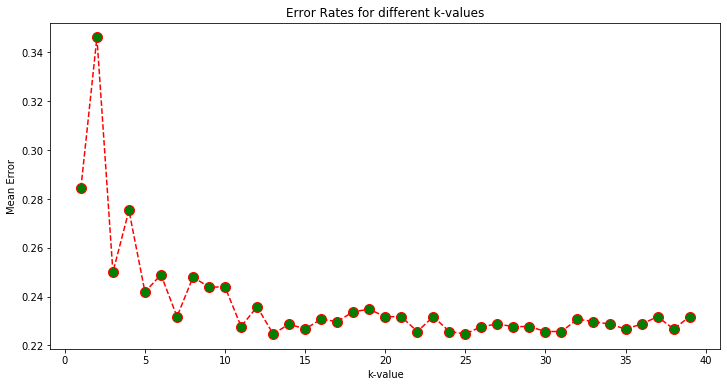

In [405]:
# Arbitrarily we chose k = 5 and it turns out to be a good choice. However, in reality we have to try mutiple values and select
# the best one. This is what we do here:

error = []

# calculate the error for k values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_y_i = knn.predict(X_test)
    error.append(np.mean(pred_y_i != y_test))
    
    
# Now, we can plot the errors
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color = 'red', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rates for different k-values')
plt.xlabel('k-value')
plt.ylabel('Mean Error')
plt.show()


In [406]:
#create an instance

My_KNN = KNeighborsClassifier(n_neighbors = 21) 
My_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [407]:
#predict test
y_predict = My_KNN.predict(X_test)

#predict train
y_predict_train = My_KNN.predict(X_train)

In [408]:
#accuracy score
from sklearn.metrics import accuracy_score

print('test data is: ', accuracy_score(y_test, y_predict))
print('training data is: ', accuracy_score(y_train, y_predict_train))

test data is:  0.7682186234817814
training data is:  0.800506329113924


In [409]:
#add to metrics df

accuracydf3_B['KNN'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# DECISION TREE

In [410]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

In [411]:
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(X, y, test_size = .2)

from sklearn.tree import DecisionTreeClassifier

My_Tree = DecisionTreeClassifier(max_depth = 3 ,min_samples_leaf = 7)

My_Tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [412]:
# print accuracy scores

y_predict = My_Tree.predict(X_test)
y_predict_train = My_Tree.predict(X_train)

from sklearn.metrics import accuracy_score

print("test", accuracy_score(y_test, y_predict))
print("train", accuracy_score(y_train, y_predict_train))

test 0.7530364372469636
train 0.7668354430379747


In [413]:
#add to metrics df

accuracydf3_B['Decision Tree'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


## SVM - Only for Binary

In [414]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

## SVM Parameter Tuning

In [415]:
c_parameters = [.1,.5,1,5]

for c in c_parameters:
   # splitting data
    from sklearn.model_selection import train_test_split as SPLIT

    X_train, X_test, y_train, y_test = SPLIT(X, y, test_size = .2)

    # Developing Model
    from sklearn.svm import SVC

    My_SVC = SVC(kernel = 'linear', C = c)

    My_SVC.fit(X_train, y_train)
    
    y_predict = My_SVC.predict(X_test)

    y_predict_train = My_SVC.predict(X_train)
    
    from sklearn.metrics import accuracy_score
    
    print(f'SVC accuracy Test Data {c} = ', accuracy_score(y_test, y_predict))

    print(f'SVC accuracy Training Data {c} = ', accuracy_score(y_train, y_predict_train))
    
    print('Error = :', round(abs(accuracy_score(y_test, y_predict) - accuracy_score(y_train, y_predict_train)),3))


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 0.1 =  0.8178137651821862
SVC accuracy Training Data 0.1 =  0.810379746835443
Error = : 0.007


SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 0.5 =  0.805668016194332
SVC accuracy Training Data 0.5 =  0.8078481012658227
Error = : 0.002


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 1 =  0.7975708502024291
SVC accuracy Training Data 1 =  0.809620253164557
Error = : 0.012


SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC accuracy Test Data 5 =  0.8107287449392713
SVC accuracy Training Data 5 =  0.810379746835443
Error = : 0.0


In [416]:
# splitting data
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(X, y, test_size = .2)

# Developing Model
from sklearn.svm import SVC

My_SVC = SVC(kernel = 'linear', C = 1)

My_SVC.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [417]:
y_predict = My_SVC.predict(X_test)

y_predict_train = My_SVC.predict(X_train)

In [418]:
from sklearn.metrics import accuracy_score

In [419]:
print('SVC accuracy on Test Data = ', accuracy_score(y_test, y_predict))

print('SVC accuracy on Training Data = ', accuracy_score(y_train, y_predict_train))


SVC accuracy on Test Data =  0.8218623481781376
SVC accuracy on Training Data =  0.8073417721518987


In [420]:
#add to metrics df

accuracydf3_B['SVM'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Dummy Classifier for SVC Model

In [421]:
y_binary_imbalanced = y.copy()

y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print ('Original labels:', y[1:30])

print ('New binary labels:', y_binary_imbalanced[1:30])

Original labels: season
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
Name: non_loss, dtype: int64
New binary labels: season
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
2006/2007    0
2006/2007    0
2006/2007    1
2006/2007    1
Name: non_loss, dtype: int64


In [422]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

#  The dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [423]:
print ("Accuracy score of Dummy Classifier = ", accuracy_score(y_test, y_dummy_predictions))

Accuracy score of Dummy Classifier =  0.7226720647773279


# GNB

In [424]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

In [425]:
from sklearn.model_selection import train_test_split as SPLIT

X_train, X_test, y_train, y_test = SPLIT(X, y)

In [426]:
# Import Libraries
# from sklear.naive_bayes import GaussianNB

from sklearn.naive_bayes import GaussianNB

My_GNB = GaussianNB().fit(X_train,y_train)


In [427]:
# make prediction on training and test data 
y_predict = My_GNB.predict(X_test)
y_predict_train = My_GNB.predict(X_train)


#accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy Test = ", accuracy_score(y_test, y_predict))
print("Accuracy Train = ", accuracy_score(y_train, y_predict_train))

Accuracy Test =  0.6720647773279352
Accuracy Train =  0.6740480691331353


In [428]:
#add to metrics df

accuracydf3_B['GNB'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Random Forest

In [429]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

In [430]:
# import RandomForestClassifier from sklearn.ensemble module

from sklearn.ensemble import RandomForestClassifier as FOREST

k = 10

My_Forest = FOREST(max_depth = 4 ,min_samples_leaf = 10, max_features = k).fit(X_train, y_train)


In [431]:
y_predict = My_Forest.predict(X_test)
y_predict_train = My_Forest.predict(X_train)

print('Test', accuracy_score(y_test, y_predict))
print('Train', accuracy_score(y_train, y_predict_train))

Test 0.7684210526315789
Train 0.7890899270861463


In [432]:
#add to metrics df

accuracydf3_B['Rand Forest'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Gradient Boosted Decision Trees

In [433]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

In [434]:
# Import Libraries
# from sklear.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBDT

# set the random_state = 0
My_GBDT = GBDT().fit(X_train, y_train)

In [435]:
from sklearn.metrics import accuracy_score

# make prediction on training and test data 

y_pred = My_GBDT.predict(X_test)

y_pred_train = My_GBDT.predict(X_train)

# print accuracy_score for your predictions
print ("Accuracy Score on Test Data = ", accuracy_score(y_test, y_pred))
print ("Accuracy Score on Train Data = ", accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data =  0.8048582995951417
Accuracy Score on Train Data =  0.8501215230893869


In [436]:
# set the values for learning_rate and max_depth to control the performance of the algorithm
# ReDo it for different values

My_GBDT_2 = GBDT(learning_rate = .1, max_depth = 2).fit(X_train, y_train)

In [437]:
# make prediction on training and test data 

y_pred = My_GBDT_2.predict(X_test)

y_pred_train = My_GBDT_2.predict(X_train)

# print accuracy_score for your predictions
print ("Accuracy Score on Test Data = ", accuracy_score(y_test, y_pred))
print ("Accuracy Score on Train Data = ", accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data =  0.8072874493927126
Accuracy Score on Train Data =  0.8220361868755064


In [438]:
#add to metrics df

accuracydf3_B['GB Dec Tree'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]


# Artificial Neural Network

In [439]:
# Asigning Variables

X = df3.iloc[:,:-3]
y = df3.iloc[:,-1]

In [440]:
# Import Libraries

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

## ANN Paramater Tuning

In [441]:
a_parameters = [1, 3, 5, 10]

for a in a_parameters:

    
    # Scale Data

    Scaler = MinMaxScaler()

    X_train_scaled = Scaler.fit_transform(X_train)
    X_test_scaled = Scaler.transform(X_test)

    # Build Model
    My_ANN = MLPClassifier(activation = 'tanh', hidden_layer_sizes = [10, 10], alpha = a, solver = 'lbfgs').fit(X_train_scaled, y_train)

    # make prediction on training and test data 

    y_pred = My_ANN.predict(X_test_scaled)

    y_pred_train = My_ANN.predict(X_train_scaled)

    # print accuracy_score for your predictions
    print (f"Accuracy Score on Test Data = {a} ", accuracy_score(y_test, y_pred))
    print (f"Accuracy Score on Train Data = {a}", accuracy_score(y_train, y_pred_train))
    print(f'Error {a} = :', accuracy_score(y_test, y_pred) - accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data = 1  0.8040485829959514
Accuracy Score on Train Data = 1 0.8239265460437483
Error 1 = : -0.019877963047796876
Accuracy Score on Test Data = 3  0.8032388663967611
Accuracy Score on Train Data = 3 0.8223062381852552
Error 3 = : -0.019067371788494047
Accuracy Score on Test Data = 5  0.805668016194332
Accuracy Score on Train Data = 5 0.8182554685390224
Error 5 = : -0.012587452344690386
Accuracy Score on Test Data = 10  0.8080971659919028
Accuracy Score on Train Data = 10 0.8144747502025385
Error 10 = : -0.006377584210635612


In [442]:
# Scale Data

Scaler = MinMaxScaler()

X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [443]:
# Build Model
My_ANN = MLPClassifier(activation = 'tanh', hidden_layer_sizes = [10, 10], alpha = 3, solver = 'lbfgs').fit(X_train_scaled, y_train)


In [444]:
# make prediction on training and test data 

y_pred = My_ANN.predict(X_test_scaled)

y_pred_train = My_ANN.predict(X_train_scaled)

# print accuracy_score for your predictions
print ("Accuracy Score on Test Data = ", accuracy_score(y_test, y_pred))
print ("Accuracy Score on Train Data = ", accuracy_score(y_train, y_pred_train))

Accuracy Score on Test Data =  0.8024291497975709
Accuracy Score on Train Data =  0.8206859303267621


In [445]:
# Add results to metrics df

accuracydf3_B['ANN'] = [accuracy_score(y_test, y_predict), accuracy_score(y_train, y_predict_train)]

In [446]:
rsquaresdf3_B.rename(index = {0: "Test", 1:"Train"}, inplace = True)
rsquaresdf3_B

,MLR,Ridge,Ridge - Feature Scale,Ridge - Poly Features,Lasso,Lasso - Feature Scaling
Test,0.314759,0.328556,0.316049,0.305733,0.249974,-0.000607
Train,0.321320,0.317666,0.301477,0.320682,0.246790,0.000000


In [447]:
accuracydf3_B.rename(index = {0: "Test", 1:"Train"}, inplace = True)
accuracydf3_B

,KNN,Decision Tree,SVM,GNB,Rand Forest,GB Dec Tree,ANN
Test,0.768219,0.753036,0.821862,0.672065,0.768421,0.768421,0.768421
Train,0.800506,0.766835,0.807342,0.674048,0.789090,0.789090,0.789090


# Cross-Validation

In [448]:
# Multi Linear Regression
CV_scores = cross_val_score(my_model, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.27747658 0.27824328 0.25731322 0.28712508 0.28839891 0.32568962
 0.28965064 0.32324593 0.38131034 0.34015304]
Average CV_Score =  0.3048606638378811


In [449]:
# Ridge Regression
CV_scores = cross_val_score(my_Ridge, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.27750536 0.27824956 0.25731732 0.28713176 0.2883603  0.32570731
 0.28963914 0.32323965 0.38131799 0.34015009]
Average CV_Score =  0.30486184656110477


In [450]:
# Ridge + Feature Scaling 
# Same Code for Ridge + Polynomial Features
CV_scores = cross_val_score(my_ridge, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.27750217 0.27824887 0.25731686 0.28713102 0.28836459 0.32570535
 0.28964042 0.32324035 0.38131714 0.34015042]
Average CV_Score =  0.3048617180128986


In [451]:
# Lasso
# Same Code for Lasso + Feature Scaling
CV_scores = cross_val_score(my_Lasso, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.09197496 0.08988404 0.07940072 0.0449511  0.07718988 0.07852233
 0.05956497 0.06022491 0.12094654 0.11303438]
Average CV_Score =  0.08156938391474912


In [452]:
# KNN 
CV_scores = cross_val_score(My_KNN, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.72469636 0.72064777 0.73076923 0.72469636 0.70445344 0.72064777
 0.73684211 0.70242915 0.72819473 0.72210953]
Average CV_Score =  0.7215486445869705


In [453]:
# Decision Tree
CV_scores = cross_val_score(My_Tree, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.7388664  0.75101215 0.75506073 0.74898785 0.75101215 0.74898785
 0.73076923 0.74493927 0.80121704 0.74442191]
Average CV_Score =  0.751527457276363


In [454]:
# SVM
CV_scores = cross_val_score(My_SVC, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.7854251  0.77125506 0.79554656 0.79757085 0.8097166  0.79149798
 0.81174089 0.81578947 0.83975659 0.80933063]
Average CV_Score =  0.8027629731216793


In [455]:
# GNB
CV_scores = cross_val_score(My_GNB, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.74089069 0.70850202 0.74089069 0.62955466 0.65587045 0.65587045
 0.6437247  0.66194332 0.65314402 0.65922921]
Average CV_Score =  0.6749620188714883


In [456]:
#Random Forest
CV_scores = cross_val_score(My_Forest, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))


CV_scores are :  [0.74493927 0.75506073 0.74696356 0.77935223 0.77935223 0.78137652
 0.77125506 0.78947368 0.8296146  0.78498986]
Average CV_Score =  0.7762377741826871


In [457]:
#Gradient Boosted 
CV_scores = cross_val_score(My_GBDT, X, y, cv = 10)
print ("CV_scores are : ", CV_scores)
print ("Average CV_Score = ",np.mean(CV_scores))

CV_scores are :  [0.78744939 0.79757085 0.78947368 0.77935223 0.82793522 0.78137652
 0.81376518 0.82388664 0.84989858 0.81135903]
Average CV_Score =  0.8062067323090062


In [458]:














#

# <div class="alert alert-block alert-success"> Final Tables </div>

# Starts with Posession, Target is Home Win = 1, Home Tie or Loss = 0
# Predicts if the Home Team will win based off of game stats

In [459]:
rsquaresdf2_A

,MLR,Ridge,Ridge - Feature Scale,Ridge - Poly Features,Lasso,Lasso - Feature Scaling
Test,0.324920,0.317923,0.329071,0.354378,0.279093,-0.001454
Train,0.351813,0.358007,0.329965,0.348393,0.285807,0.000000


In [460]:
accuracydf2_A

,KNN,Decision Tree,SVM,GNB,Rand Forest,GB Dec Tree,ANN
Test,0.720648,0.702429,0.784413,0.624291,0.726316,0.726316,0.726316
Train,0.752405,0.710380,0.767342,0.629220,0.749122,0.749122,0.749122


# Starts with Posession, Target is Home Win or Tie = 1, Home Loss = 0
# Predicts if the Home Team will not lose based off of game stats

In [461]:
rsquaresdf2_B

,MLR,Ridge,Ridge - Feature Scale,Ridge - Poly Features,Lasso,Lasso - Feature Scaling
Test,0.297519,0.303748,0.280091,0.283248,0.217232,-0.00118
Train,0.318174,0.317217,0.304775,0.322553,0.251788,0.00000


In [462]:
accuracydf2_B

,KNN,Decision Tree,SVM,GNB,Rand Forest,GB Dec Tree,ANN
Test,0.786437,0.747976,0.803644,0.661538,0.780567,0.780567,0.780567
Train,0.785570,0.752658,0.810127,0.668647,0.786389,0.786389,0.786389


# Starts with Home and Away Teams, Target is Home Win = 1, Home Tie or Loss = 0
# Predicts if the Home Team will win based off of the game stats

In [463]:
rsquaresdf3_A

,MLR,Ridge,Ridge - Feature Scale,Ridge - Poly Features,Lasso,Lasso - Feature Scaling
Test,0.395492,0.367958,0.323248,0.382451,0.295344,-0.001091
Train,0.348102,0.354918,0.342202,0.351184,0.284577,0.000000


In [464]:
accuracydf3_A

,KNN,Decision Tree,SVM,GNB,Rand Forest,GB Dec Tree,ANN
Test,0.698381,0.698381,0.796559,0.642915,0.728745,0.728745,0.728745
Train,0.743797,0.715190,0.772152,0.633270,0.763705,0.763705,0.763705


# Starts with Home and Away Teams, Target is Home Win or Tie = 1, Home Loss = 0
# Predicts if the Home Team will not lose based off of game stats

In [465]:
rsquaresdf3_B

,MLR,Ridge,Ridge - Feature Scale,Ridge - Poly Features,Lasso,Lasso - Feature Scaling
Test,0.314759,0.328556,0.316049,0.305733,0.249974,-0.000607
Train,0.321320,0.317666,0.301477,0.320682,0.246790,0.000000


In [466]:
accuracydf3_B

,KNN,Decision Tree,SVM,GNB,Rand Forest,GB Dec Tree,ANN
Test,0.768219,0.753036,0.821862,0.672065,0.768421,0.768421,0.768421
Train,0.800506,0.766835,0.807342,0.674048,0.789090,0.789090,0.789090


In [467]:














#

# <div class="alert alert-block alert-success"> Final Results </div>

In [468]:
# Forecasting Home Win with anonymous team names with forecasted game statistics

#Train: 76.91%
#Test: 76.65%

In [469]:
# Forecasting Home Non-Loss with anonymous team names with forecasted game statistics

#Train: 80.51%
#Test: 80.77%

In [470]:
# Forecasting Home Win with known Home and Away team with forecasted game statistics

#Train: 77.87%
#Test: 78.04%

In [471]:
# Forecasting Home Non-Loss with known Home and Away team with forecasted game statistics

#Train: 81.42%
#Test: 81.12%

# <div class="alert alert-block alert-warning"> Interesting Findings </div>

## 1

The more shots a home team takes, the more shots the away team takes.
A team would rather take fewer shots with higher quality, since the more they shoot, the more shots the away team will get.


## 2

Knowing the teams that are playing yields a slightly better result in predicting the result of a match.
This shows that sometimes the teams that are playing are sometimes more important than just pure game statistics in predicting the result.

## 3

There was a lower correlation between away possession and away goals than home possesion and home goals, so it is clear to see that home teams are more focused on build up play and away teams are most focused on counter attacks.